In [1]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.RandomState(42)


In [2]:
def gaussian_psf(size, sigma):
    """
    Generates a 2D Gaussian kernel.

    Parameters:
        size (int): Kernel size (must be odd for symmetry).
        sigma (float): Standard deviation of the Gaussian.

    Returns:
        np.ndarray: Normalized 2D Gaussian kernel.
    """
    ax = np.arange(-(size // 2), size // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)  # Normalize to ensure sum = 1


In [3]:
# Define PSF parameters
psf_size = 5  # Kernel size (odd)
sigma = 2 # 625e-9 / (2 * np.pi) * 10  # wavelength * f / 2 * pi * D
gaussian_kernel = gaussian_psf(psf_size, sigma)

[[0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.03832756 0.05576627 0.06319146 0.05576627 0.03832756]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]]


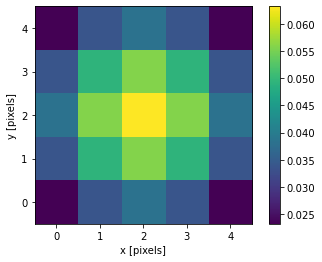

In [4]:
print(gaussian_kernel)

plt.imshow(gaussian_kernel, interpolation='none', origin='lower')
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
plt.colorbar()
plt.show()

In [44]:
img_size = 8
im = np.random.randint(1, 10, (img_size, img_size))
kern = 2
im_pad = np.pad(im, kern, mode="reflect")
th = np.argwhere(im_pad > 4)

In [45]:
th.shape

(77, 2)

In [32]:
a.pop()

5

In [33]:
a.reverse()
a.pop()


1

In [10]:
dt = 1
proc_noise_cov = np.array([[dt**3 / 3, dt**2 / 2],[dt*2 / 2, dt]])
q = 0.001
Q = np.bmat([[proc_noise_cov, np.zeros((2,2))], [np.zeros((2,2)), proc_noise_cov]])
Q

matrix([[0.33333333, 0.5       , 0.        , 0.        ],
        [1.        , 1.        , 0.        , 0.        ],
        [0.        , 0.        , 0.33333333, 0.5       ],
        [0.        , 0.        , 1.        , 1.        ]])